In [173]:
# Importing the libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [174]:
#Importing the dataset
from sklearn.datasets import load_boston

In [175]:
data = load_boston()

In [176]:
df = pd.DataFrame(data.data, columns=data.feature_names)

In [177]:
#Performing basic EDA to know more about the variables
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [178]:
# Getting the target variable
df1 = pd.DataFrame(data= np.c_[data['target']],columns= ['target'])

In [179]:
df1.head()

,target
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [180]:
# Joining the features and labels
df = pd.concat([df, df1], axis=1)

In [181]:
## CRIM - per capita crime rate by town
## ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
## INDUS - proportion of non-retail business acres per town.
## CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
## NOX - nitric oxides concentration (parts per 10 million)
## RM - average number of rooms per dwelling
## AGE - proportion of owner-occupied units built prior to 1940
## DIS - weighted distances to five Boston employment centres
## RAD - index of accessibility to radial highways
## TAX - full-value property-tax rate per $10,000
## PTRATIO - pupil-teacher ratio by town
## B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
## LSTAT - % lower status of the population
## MEDV - Median value of owner-occupied homes in $1000's

In [182]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [183]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [184]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64

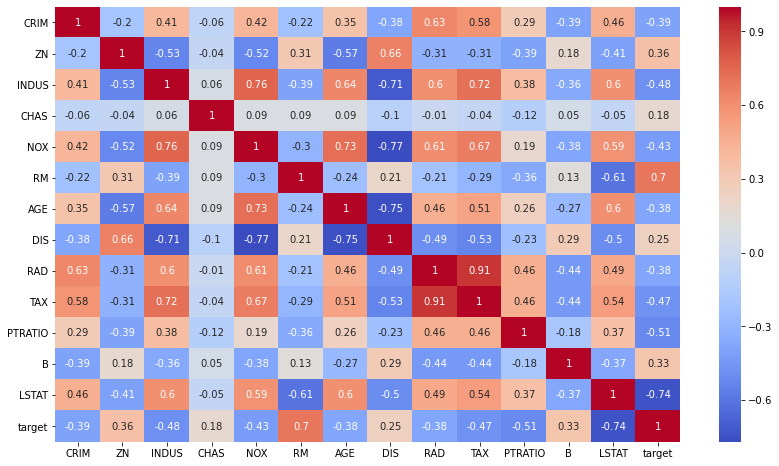

In [190]:
# Plot the correlation heatmap
plt.figure(figsize=(14, 8))
corr_matrix = df.corr().round(2)
sns.heatmap(data=corr_matrix,cmap='coolwarm',annot=True)

# TAX AND RAD Shows higest correlation (.91)

In [191]:
scaler =StandardScaler()
X_scaled = scaler.fit_transform(X)
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X_scaled
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif["Features"] = X.columns

In [192]:
# Checking the vif to find the correlation, vif>10 is high vif
vif

,VIF,Features
0,1.791940,CRIM
1,2.184240,ZN
2,3.226015,INDUS
3,1.058220,CHAS
4,4.369271,NOX
5,1.923075,RM
6,3.098044,AGE
7,3.954446,DIS
8,2.837494,RAD
9,1.788839,PTRATIO


### Model 1

In [193]:
X = df.drop(columns=['target'])
y = df['target']

In [194]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [195]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: target, Length: 506, dtype: float64

In [196]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.25,random_state=42)

In [197]:
ran = RandomForestRegressor(n_estimators = 50, random_state = 42)

In [198]:
ran.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=50,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [199]:
y_pred = ran.predict(X_test)
y_pred

array([23.006, 30.268, 17.148, 23.394, 17.702, 21.18 , 19.238, 15.936,
       21.198, 20.826, 20.442, 19.274,  8.408, 21.052, 19.222, 26.682,
       18.928,  8.116, 45.636, 14.922, 24.034, 23.866, 14.698, 24.514,
       14.39 , 14.422, 21.506, 14.058, 19.356, 20.702, 19.954, 23.158,
       32.728, 20.768, 14.562, 15.984, 34.588, 19.142, 20.904, 24.16 ,
       19.06 , 29.628, 44.826, 19.066, 22.468, 13.142, 15.496, 24.062,
       18.892, 27.614, 20.99 , 33.812, 17.54 , 26.416, 45.742, 22.278,
       15.24 , 32.732, 22.518, 21.168, 25.356, 33.704, 28.77 , 18.274,
       26.868, 16.156, 13.754, 23.062, 28.006, 15.644, 20.44 , 29.084,
       10.47 , 21.612, 22.076,  7.15 , 19.966, 44.83 , 10.83 , 12.736,
       21.608, 11.648, 19.882,  9.272, 20.38 , 27.246, 15.438, 23.132,
       23.906, 18.242, 21.86 ,  8.004, 19.72 , 19.24 , 24.306, 19.688,
       40.91 , 11.752, 12.736, 12.438, 20.318, 22.976, 13.48 , 19.906,
       20.798, 12.282, 19.192, 24.328, 20.64 , 23.742,  8.792, 16.134,
      

In [200]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8551942565516254

In [201]:
r2_score(y_test, y_pred,multioutput='variance_weighted')

0.8551942565516254

In [202]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

2.1325669291338585

### Model 2

In [203]:
X = df.drop(columns=['target','TAX'])
y = df['target']

In [204]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,21.0,393.45,6.48


In [205]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.25,random_state=42)

In [206]:
ran1 = RandomForestRegressor(n_estimators = 50, random_state = 42)

In [207]:
ran1.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=50,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [208]:
ran1.score(X_test, y_test)

0.8482878079817768

In [209]:
r2_score(y_test, y_pred,multioutput='variance_weighted')

0.8551942565516254

In [210]:
mean_absolute_error(y_test, y_pred)

2.1325669291338585

### Model 1 and Model 2 both shows same performance. Model 2 is more reliable though, R2 -> .85, Adj R2 -> .855, MAPE --> 2.13

### We will accept Model 2